# Чтение данных, очистка данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import random
import torch

from sklearn.linear_model import SGDRegressor

from sklearn.feature_selection import RFECV

%matplotlib inline

In [2]:
import pandas as pd
# 读取数据
data = pd.read_csv("car_price.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [3]:
print(data.isnull().sum())
print(data.duplicated().sum())

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64
0


# EDA

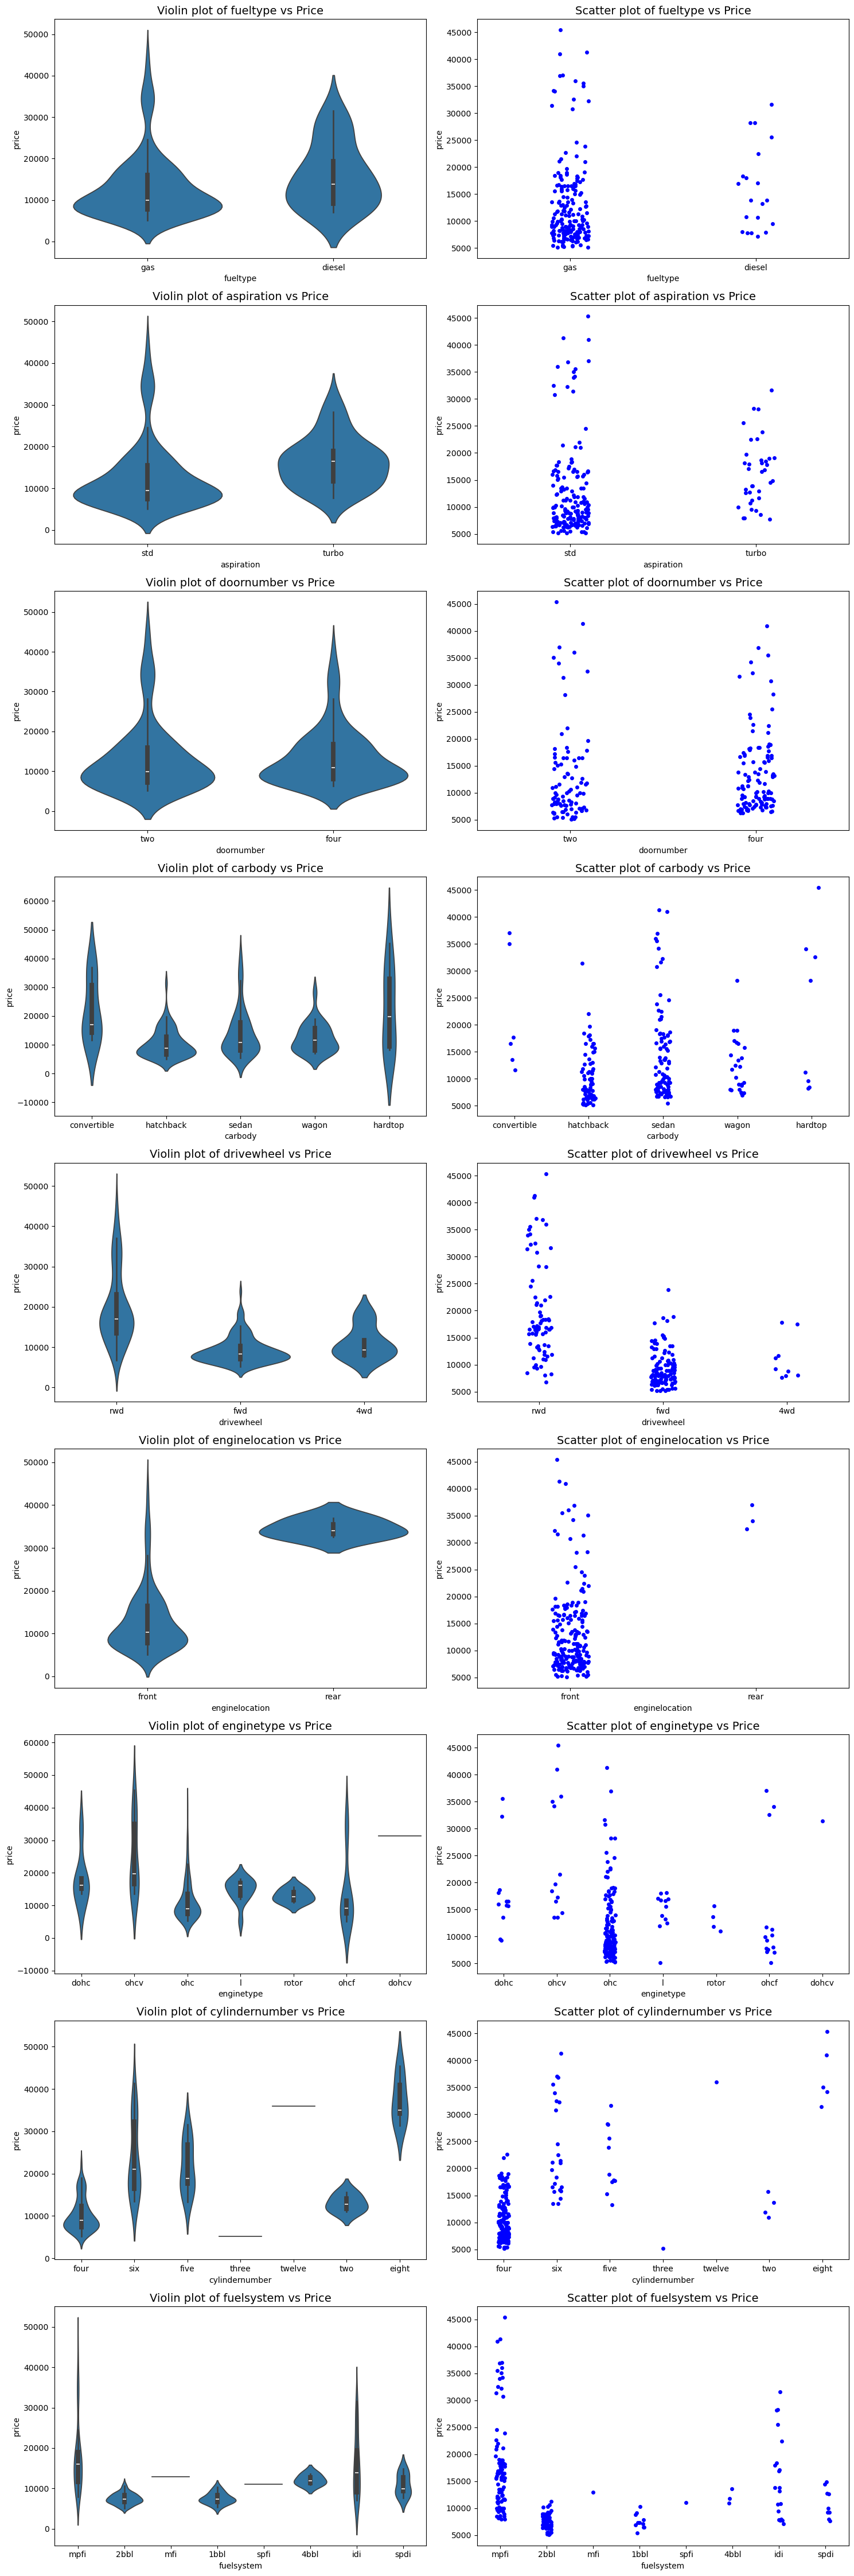

In [4]:

# 筛选出字符串类型的特征列
string_columns = data.select_dtypes(include='object').columns
string_columns = string_columns.drop('CarName')
# 创建子图，分别绘制小提琴图和散点图
fig, axes = plt.subplots(len(string_columns), 2, figsize=(15, 5 * len(string_columns)))

for idx, col in enumerate(string_columns):
    # 小提琴图：字符串特征 vs 该特征的数值分布
    sns.violinplot(data=data, x=col, y="price", ax=axes[idx, 0])
    axes[idx, 0].set_title(f'Violin plot of {col} vs Price', fontsize=14)

    # 散点图：字符串特征 vs price
    sns.stripplot(data=data, x=col, y="price", ax=axes[idx, 1], jitter=True, color='blue')
    axes[idx, 1].set_title(f'Scatter plot of {col} vs Price', fontsize=14)

# 调整子图布局
plt.tight_layout()
plt.show()

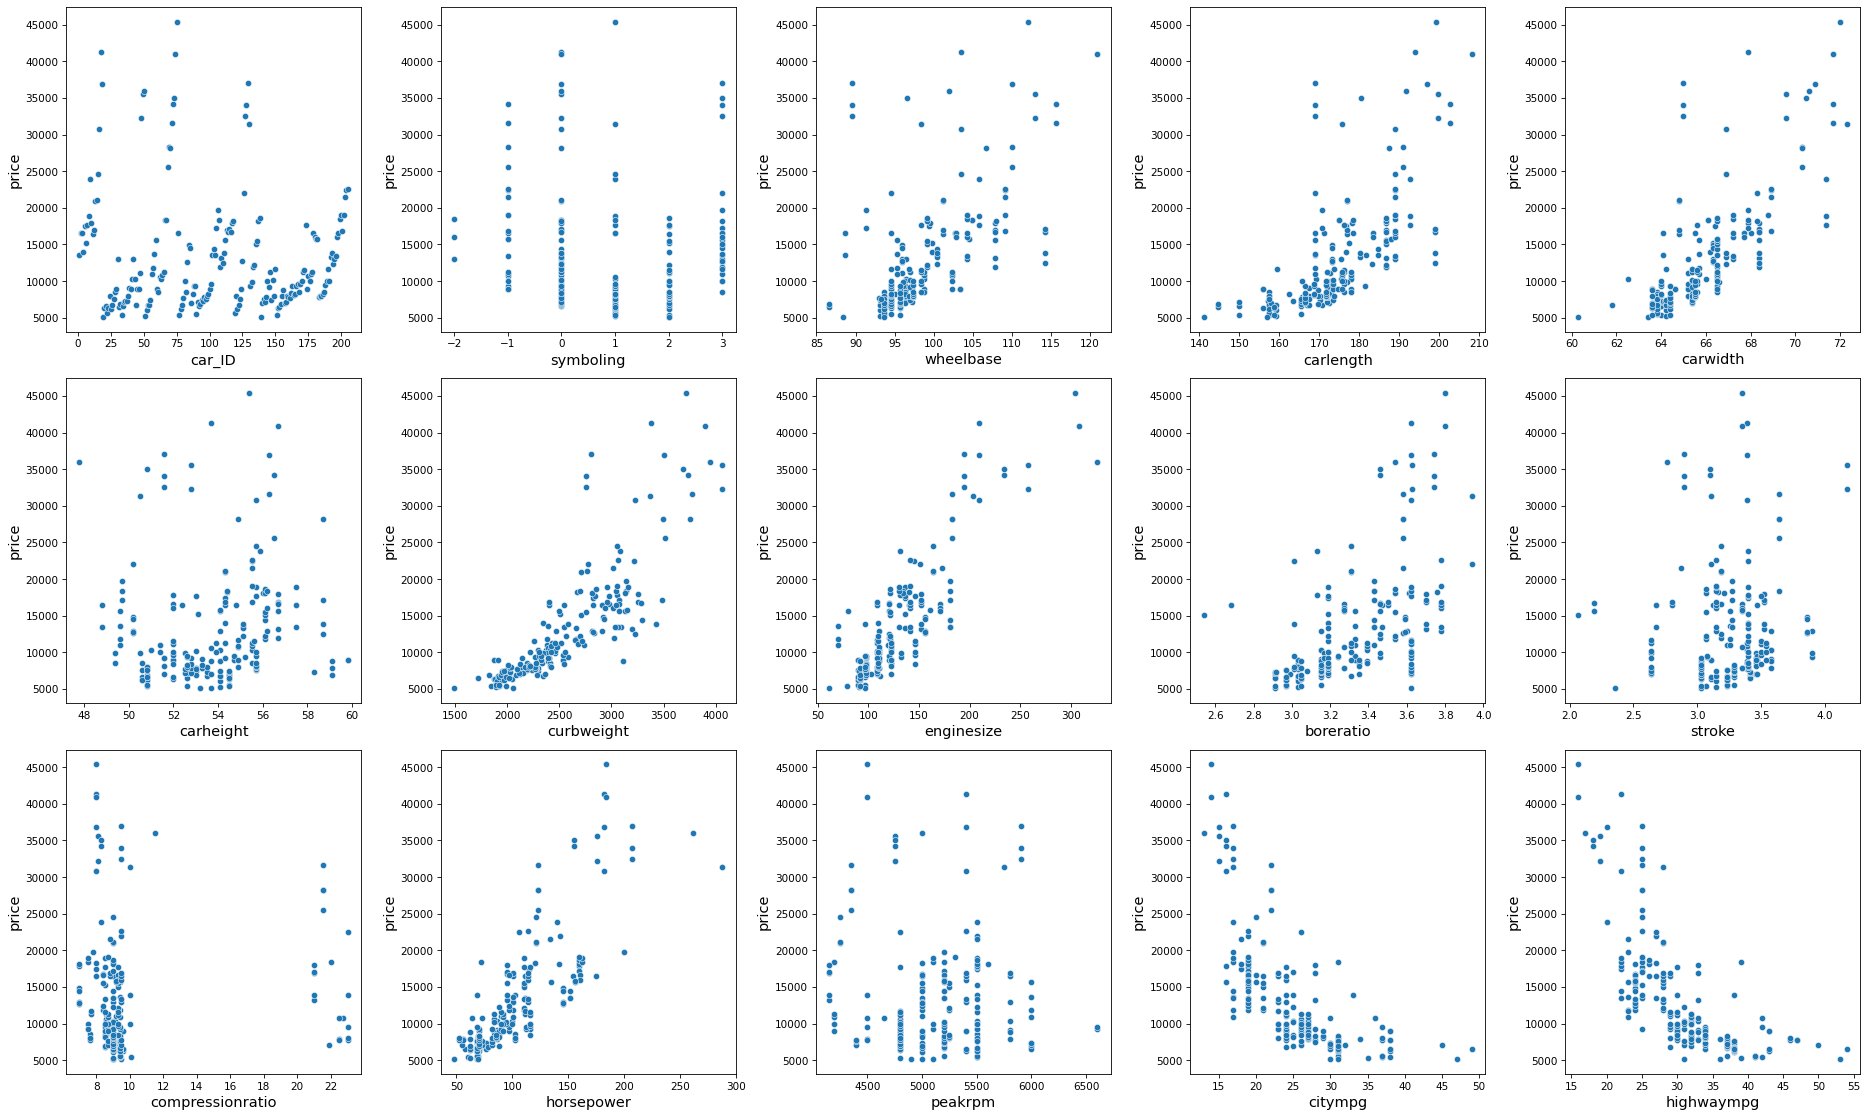

In [5]:
numeric_columns = data.select_dtypes(include='number').columns.drop("price")
# 创建子图，3行3列，因为有8个特征
fig, axes = plt.subplots(3, 5, figsize=(25, 15), dpi=75)

# 将特征列（除了Price列）与Price进行散点图绘制
for idx, col in enumerate(numeric_columns):  # 忽略最后一列 'Price'
    ax = axes[idx // 5, idx % 5]  # 获取当前子图的位置
    sns.scatterplot(data=data, x=col, y='price', ax=ax)  # 绘制散点图
    ax.set_xlabel(col, fontsize=14)  # 设置X轴为特征名称
    ax.set_ylabel('price', fontsize=14)  # 设置Y轴为Price

# 调整子图布局
plt.tight_layout()
plt.show()

#####
Из графика видно, что следующие признаки имеют сильную линейную зависимость с ценой (price):
curbweight
enginesize
horsepower


## *<font color = red>URF</font>*

In [6]:
X = data[numeric_columns].values
y = data["price"].values

model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=12)
rfe.fit(X, y)
#X_new = X.loc[:,rfe.support_]
print(rfe.support_)
X_new = X[:, rfe.support_]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.1, random_state=42)
X_train

selected_columns = numeric_columns[rfe.support_]
selected_columns

[False  True  True  True  True  True False  True  True  True  True  True
 False  True  True]


Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'citympg', 'highwaympg'],
      dtype='object')

#### RFE result: carwidth, citympg, boreratio, stroke

## Нарисуйте коробчатую диаграмму и распечатайте количество выбросов

car_ID - Number of outliers: 0
symboling - Number of outliers: 0
wheelbase - Number of outliers: 3
carlength - Number of outliers: 1
carwidth - Number of outliers: 8
carheight - Number of outliers: 0
curbweight - Number of outliers: 0
enginesize - Number of outliers: 10
boreratio - Number of outliers: 0
stroke - Number of outliers: 20
compressionratio - Number of outliers: 28
horsepower - Number of outliers: 6
peakrpm - Number of outliers: 2
citympg - Number of outliers: 2
highwaympg - Number of outliers: 3


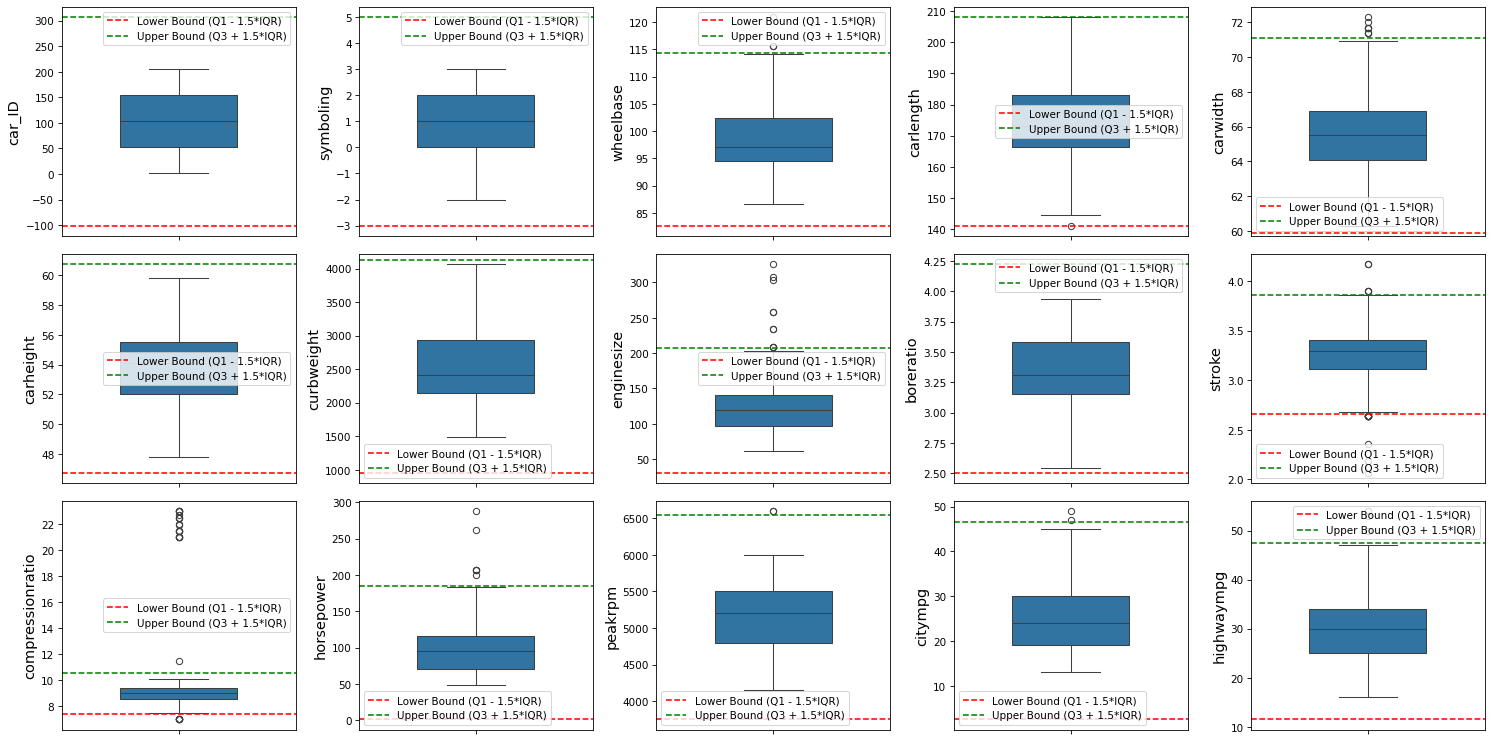

In [7]:
numeric_columns = data.select_dtypes(include='number').columns.drop("price")
# 创建子图，2行4列
fig, axes = plt.subplots(3, 5, figsize=(20, 10), dpi=75)
# 遍历特征列进行绘制
for idx, col in enumerate(numeric_columns):  # 使用索引进行遍历
    ax = axes[idx // 5, idx % 5]  # 获取当前子图的位置
    sns.boxplot(data=data, y=col, width=0.5, ax=ax)  # 注意：绘制的是df的某一列
    ax.set_ylabel(col, fontsize=14)  # 设置y轴标签

    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # 打印出界外值的数量
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    num_outliers = outliers.shape[0]
    print(f"{col} - Number of outliers: {num_outliers}")
    
    
    ax.axhline(y=Q1 - 1.5 * IQR, color='r', linestyle='--', label='Lower Bound (Q1 - 1.5*IQR)')
    ax.axhline(y=Q3 + 1.5 * IQR, color='g', linestyle='--', label='Upper Bound (Q3 + 1.5*IQR)')
    ax.legend()
# 调整子图布局
plt.tight_layout()
plt.show()

###### Удалите только значение selected_columns, чтобы не удалить слишком много данных.

In [8]:
#移出界外值，只针对selected_columns，以免删除过多数据
print("Old len of data :",len(data))
for col in selected_columns:
    print(f"Processing column: {col}")
    
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    data = data.loc[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    
    
print("New len of data :",len(data))


Old len of data : 205
Processing column: symboling
Processing column: wheelbase
Processing column: carlength
Processing column: carwidth
Processing column: carheight
Processing column: enginesize
Processing column: boreratio
Processing column: stroke
Processing column: compressionratio
Processing column: horsepower
Processing column: citympg
Processing column: highwaympg
New len of data : 132


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)
X_train

array([[  0. , 104.9, 175. , ...,  72. ,  31. ,  39. ],
       [  0. , 107.9, 186.7, ...,  95. ,  19. ,  24. ],
       [  0. ,  95.7, 169.7, ...,  62. ,  31. ,  37. ],
       ...,
       [  1. ,  94.5, 165.3, ...,  69. ,  31. ,  37. ],
       [  3. , 102.9, 183.5, ..., 161. ,  19. ,  24. ],
       [  0. , 100.4, 184.6, ..., 152. ,  17. ,  22. ]])

##### Масштабирование данных

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


scaler_X = StandardScaler()
scaler_y = StandardScaler()


X_train = scaler_X.fit_transform(X_train)
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))


X_test = scaler_X.transform(X_test)
y_test = scaler_y.transform(y_test.reshape(-1, 1))


# *<font color = red>Модель реализации SDG,Mini Batch Gradient Descent</font>*

In [11]:
def SDG_MBGD_self(X, y, lr, epochs, batch_size, w, b):
    m, n = X.shape  # 样本数量和特征数量
    losses = []
    for epoch in range(epochs):
        # 随机打乱数据
        shuffled_indices = np.random.permutation(m)
        X_shuffled = X[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        epoch_losses = []  
        for i in range(0, m, batch_size):
            xi = X_shuffled[i:i+batch_size]  
            yi = y_shuffled[i:i+batch_size]  
            y_pred = xi.dot(w) + b

            loss = np.mean((y_pred - yi) ** 2)
            epoch_losses.append(loss)

            gradient_w = 2 * xi.T.dot(y_pred - yi) / batch_size
            gradient_b = 2 * np.sum(y_pred - yi) / batch_size

            w = w - lr * gradient_w
            b = b - lr * gradient_b
        avg_loss = np.mean(epoch_losses)
        losses.append(avg_loss)
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, Avg Loss: {avg_loss}, w: {w}, b: {b}")
    
    plt.plot(losses, marker='.', label='Average Loss per Epoch')
    plt.title("Average Loss Curve per Epoch")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    return w, b

In [12]:
def evaluation_model(w,b,X,y):
    mse = mean_squared_error(y, np.dot(X, w) + b)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, np.dot(X, w) + b)
    print(f"MSE: {mse}\n")
    print(f"RMSE: {rmse}\n")
    print(f"R2: {r2}\n")
    return mse,rmse,r2

In [13]:
def gradient_descent_self(X, y, lr, num_epochs, SDG_MBGD=False,batch_size = 32):
    #line model init
    num_features = X.shape[1]
    w = np.random.rand(num_features) * 0.01
    y = y.ravel()
    b = 0
    losses = []
    # if use SDG and Mini Batch Gradient Descent
    if SDG_MBGD:
        print("-------------Using SDG_MBGD-----------------")
        w,b = SDG_MBGD_self(X,y,lr,num_epochs,batch_size,w,b)
        return w,b
    print("----------------Not Using SDG_MBGD-----------")
    for epoch in range(num_epochs):
        y_pred = np.dot(X, w) + b
        loss = np.mean((y_pred - y) ** 2)
        losses.append(loss)
        
        n = len(X)
        dw = (2 / n) * np.dot(X.T, (y_pred - y))
        db = (2 / n) * np.sum(y_pred - y)
        w -= lr * dw
        b -= lr * db
        
        if epoch % 10 == 0:
            print(f"Epoch {epoch}, loss:{loss}，w:{w},b:{b} \n")

    plt.plot(losses, marker='.', label='Loss')
    plt.title("Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.legend()
    plt.grid(True)
    plt.show()
    return w,b

----------------Not Using SDG_MBGD-----------
Epoch 0, loss:0.9657717695370062，w:[ 0.00652242  0.01451493  0.0141178   0.0181438   0.00795275  0.0201872
  0.02006364  0.00374724  0.00881932  0.02453176 -0.01281449 -0.00927305],b:-3.249433242805336e-18 

Epoch 10, loss:0.3249612332777646，w:[ 0.01305209  0.06293233  0.079618    0.10037958  0.00429761  0.12709106
  0.07446161  0.00095704  0.0176492   0.12271242 -0.08955603 -0.08530009],b:-2.0108576050893687e-16 

Epoch 20, loss:0.24191648642195032，w:[ 0.02258137  0.0709492   0.0935915   0.12829732 -0.00506756  0.17758672
  0.0845673  -0.00685905  0.02991715  0.16555269 -0.11097644 -0.10539038],b:-4.758659591036631e-16 

Epoch 30, loss:0.22001391186849395，w:[ 0.03023605  0.06843585  0.0926849   0.1390985  -0.01291468  0.2083286
  0.08102167 -0.01561896  0.04264108  0.18876302 -0.11478784 -0.10790579],b:-6.997789881433075e-16 

Epoch 40, loss:0.20790612495797633，w:[ 0.03551683  0.06397948  0.08791919  0.14431983 -0.01811206  0.2311856
  0.0

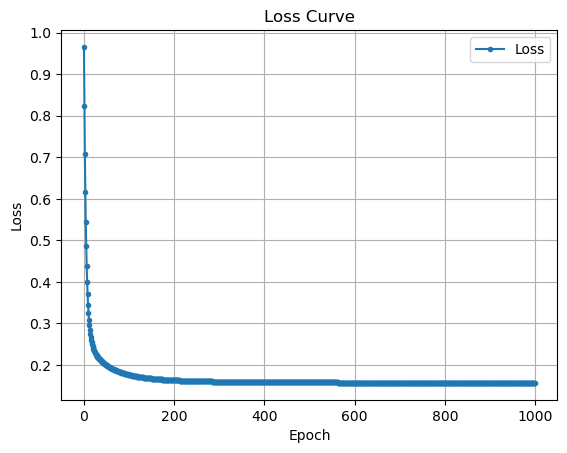

-----------model in train----------
MSE: 0.1565963394875065

RMSE: 0.39572255367556003

R2: 0.8434036605124935

-----------model in test----------
MSE: 0.22987491913553956

RMSE: 0.4794527287809921

R2: 0.8263422246071704



In [14]:
w,b = gradient_descent_self(X_train, y_train, 0.01, 1000)
print("-----------model in train----------")
mse_train,rmse_train,r2_train = evaluation_model(w,b,X_train,y_train)
print("-----------model in test----------")
mse_test,rmse_test,r2_test = evaluation_model(w,b,X_test,y_test)

-------------Using SDG_MBGD-----------------
Epoch 0, Avg Loss: 0.8805222005010341, w: [ 0.00494058  0.02676096  0.03302827  0.03684025  0.01087355  0.04392749
  0.02782994  0.00555555  0.00668899  0.04026014 -0.02492143 -0.0242913 ], b: 0.00015293936703617876
Epoch 10, Avg Loss: 0.24178662159636258, w: [ 0.02799285  0.06944572  0.09725855  0.13790818 -0.01001141  0.20370236
  0.07990692 -0.01235798  0.03513654  0.1808769  -0.11167729 -0.10786992], b: 0.00014983578252719687
Epoch 20, Avg Loss: 0.1931370559719562, w: [ 0.0397694   0.05835017  0.08436179  0.14924072 -0.02096736  0.25811602
  0.06069837 -0.03384688  0.06493207  0.21686205 -0.10629456 -0.09956371], b: 9.235692018001241e-05
Epoch 30, Avg Loss: 0.18757567376692663, w: [ 0.04333571  0.05053473  0.0711527   0.15369339 -0.02150246  0.29589733
  0.04051861 -0.05138652  0.08582138  0.23809225 -0.09831303 -0.0888936 ], b: 0.0001420039341460713
Epoch 40, Avg Loss: 0.1742115113603613, w: [ 0.04350684  0.0461505   0.06024586  0.15647

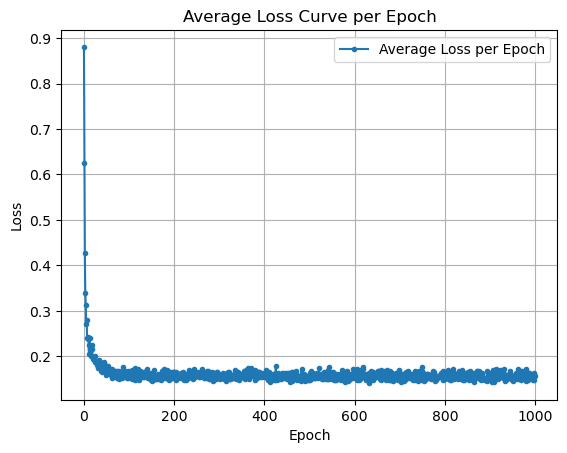

-----------model in train----------
MSE: 0.1554700974478932

RMSE: 0.3942969660647837

R2: 0.8445299025521068

-----------model in test----------
MSE: 0.2316882795943477

RMSE: 0.48134008725052985

R2: 0.8249723311692688



In [15]:
w,b = gradient_descent_self(X_train, y_train, 0.01, 1000,SDG_MBGD=True,batch_size=64)
print("-----------model in train----------")
mse_train_SDG_MBGD,rmse_train_SDG_MBGD,r2_train_SDG_MBGD = evaluation_model(w,b,X_train,y_train)
print("-----------model in test----------")
mse_test_SDG_MBGD,rmse_test_SDG_MBGD,r2_test_SDG_MBGD = evaluation_model(w,b,X_test,y_test)

In [16]:
results = {
    "MSE": [mse_train, mse_test, mse_train_SDG_MBGD, mse_test_SDG_MBGD],
    "RMSE": [rmse_train, rmse_test, rmse_train_SDG_MBGD, rmse_test_SDG_MBGD],
    "R²": [r2_train, r2_test, r2_train_SDG_MBGD, r2_test_SDG_MBGD]
}
index = [
    "Train (Normal)", 
    "Test (Normal)", 
    "Train (SDG_MBGD)", 
    "Test (SDG_MBGD)"
]
results_df = pd.DataFrame(results, index=index)
results_df

,MSE,RMSE,R²
Train (Normal),0.156596,0.395723,0.843404
Test (Normal),0.229875,0.479453,0.826342
Train (SDG_MBGD),0.155470,0.394297,0.844530
Test (SDG_MBGD),0.231688,0.481340,0.824972


#### В случае одинаковой скорости обучения и одинакового количества учебных групп между ними нет большой разницы.

In [20]:
# 1.LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"LinearRegression Train: MSE: {mse_train}, RMSE:{rmse_train},R²: {r2_train}")
print(f"LinearRegression Test: MSE: {mse_test}, RMSE:{rmse_test},R²: {r2_test}")


LinearRegression Train: MSE: 0.15511047128908906, RMSE:0.3938406673885888,R²: 0.8448895287109109
LinearRegression Test: MSE: 0.23439654341064098, RMSE:0.48414516770349053,R²: 0.8229263877871764


In [21]:
# 2.SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, learning_rate='constant', eta0=0.01, random_state=42)
sgd_reg.fit(X_train, y_train)

y_train_pred_sgd = sgd_reg.predict(X_train)
y_test_pred_sgd = sgd_reg.predict(X_test)

train_mse_sgd = mean_squared_error(y_train, y_train_pred_sgd)
test_mse_sgd = mean_squared_error(y_test, y_test_pred_sgd)

train_rmse_sgd = np.sqrt(train_mse_sgd)
test_rmse_sgd = np.sqrt(test_mse_sgd)
train_r2_sgd = r2_score(y_train, y_train_pred_sgd)
test_r2_sgd = r2_score(y_test, y_test_pred_sgd)

print(f"SGD LinearRegression Train MSE: {train_mse_sgd},  RMSE:{train_rmse_sgd},R²: {train_r2_sgd}")
print(f"SGD LinearRegression Test MSE: {test_mse_sgd}, RMSE:{test_rmse_sgd}, R²: {test_r2_sgd}")

SGD LinearRegression Train MSE: 0.15979248956818173,  RMSE:0.3997405278029509,R²: 0.8402075104318183
SGD LinearRegression Test MSE: 0.23086111833648382, RMSE:0.48048009150898624, R²: 0.8255972057074392


D:\tools\anaconda3\envs\pytorch\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [22]:
results = {
    "MSE": [mse_train, mse_test, train_mse_sgd, test_mse_sgd],
    "RMSE": [rmse_train, rmse_test, train_rmse_sgd, test_rmse_sgd],
    "R²": [r2_train, r2_test, train_r2_sgd, test_r2_sgd]
}
index = [
    "Train (LinearRegression)", 
    "Test (LinearRegression)", 
    "Train (SGDRegressor)", 
    "Test (SGDRegressor)"
]
results_df = pd.DataFrame(results, index=index)
results_df

,MSE,RMSE,R²
Train (LinearRegression),0.155110,0.393841,0.844890
Test (LinearRegression),0.234397,0.484145,0.822926
Train (SGDRegressor),0.159792,0.399741,0.840208
Test (SGDRegressor),0.230861,0.480480,0.825597


####  в случае этого набора данных нет большой разницы между использованием обычной линейной регрессии и SDG.

In [23]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd

# Ridge model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train.ravel())


y_train_pred_ridge = ridge_model.predict(X_train)
y_test_pred_ridge = ridge_model.predict(X_test)


mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
rmse_train_ridge = np.sqrt(mse_train_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)

mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
rmse_test_ridge = np.sqrt(mse_test_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)
# mse_train, rmse_train, r2_train, mse_test, rmse_test, r2_test


results = {
    "MSE (Train)": [mse_train, mse_train_ridge],
    "RMSE (Train)": [rmse_train, rmse_train_ridge],
    "R² (Train)": [r2_train, r2_train_ridge],
    "MSE (Test)": [mse_test, mse_test_ridge],
    "RMSE (Test)": [rmse_test, rmse_test_ridge],
    "R² (Test)": [r2_test, r2_test_ridge]
}

#DataFrame
index = ["Custom Model", "Ridge Model"]
results_df = pd.DataFrame(results, index=index)
results_df

,MSE (Train),RMSE (Train),R² (Train),MSE (Test),RMSE (Test),R² (Test)
Custom Model,0.155110,0.393841,0.844890,0.234397,0.484145,0.822926
Ridge Model,0.155304,0.394087,0.844696,0.233906,0.483638,0.823297


##### Повторить тоже самое, но используя кросс-валидацию.

In [24]:
from sklearn.model_selection import KFold

In [25]:
# 设定交叉验证折数
cv_folds = 5
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

mse_train_scores, mse_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []
r2_train_scores, r2_test_scores = [], []

mse_train_scores, mse_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []
r2_train_scores, r2_test_scores = [], []

mse_train_scores, mse_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []
r2_train_scores, r2_test_scores = [], []

alpha = 1.0
ridge_model = Ridge(alpha=alpha)

for train_index, test_index in kf.split(X_new):
    # 分割训练和测试集
    X_fold_train, X_fold_test = X_new[train_index], X_new[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    # Ridge 模型训练与预测
    ridge_model.fit(X_fold_train, y_fold_train.ravel())
    y_train_pred_ridge = ridge_model.predict(X_fold_train)
    y_test_pred_ridge = ridge_model.predict(X_fold_test)
    # 计算训练和测试集的 MSE, RMSE, R2
    mse_train = mean_squared_error(y_fold_train, y_train_pred_ridge)
    mse_test = mean_squared_error(y_fold_test, y_test_pred_ridge)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_fold_train, y_train_pred_ridge)
    r2_test = r2_score(y_fold_test, y_test_pred_ridge)
    # 存储结果
    mse_train_scores.append(mse_train)
    mse_test_scores.append(mse_test)
    rmse_train_scores.append(rmse_train)
    rmse_test_scores.append(rmse_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)
results = {
    "Fold1": [mse_train_scores[0], mse_test_scores[0], rmse_train_scores[0], rmse_test_scores[0], r2_train_scores[0], r2_test_scores[0]],
    "Fold2": [mse_train_scores[1], mse_test_scores[1], rmse_train_scores[1], rmse_test_scores[1], r2_train_scores[1], r2_test_scores[1]],
    "Fold3": [mse_train_scores[2], mse_test_scores[2], rmse_train_scores[2], rmse_test_scores[2], r2_train_scores[2], r2_test_scores[2]],
    "Fold4": [mse_train_scores[3], mse_test_scores[3], rmse_train_scores[3], rmse_test_scores[3], r2_train_scores[3], r2_test_scores[3]],
    "Fold5": [mse_train_scores[4], mse_test_scores[4], rmse_train_scores[4], rmse_test_scores[4], r2_train_scores[4], r2_test_scores[4]],
    "Mean (E)": [
        np.mean(mse_train_scores), np.mean(mse_test_scores),
        np.mean(rmse_train_scores), np.mean(rmse_test_scores),
        np.mean(r2_train_scores), np.mean(r2_test_scores)
    ],
    "STD": [
        np.std(mse_train_scores), np.std(mse_test_scores),
        np.std(rmse_train_scores), np.std(rmse_test_scores),
        np.std(r2_train_scores), np.std(r2_test_scores)
    ]
}


# Create DataFrame 
index = ["MSE-Train", "MSE-Test", "RMSE-Train", "RMSE-Test", "R²-Train", "R²-Test"]
results_df = pd.DataFrame(results, index=index)
results_df

,Fold1,Fold2,Fold3,Fold4,Fold5,Mean (E),STD
MSE-Train,9.256195e+06,1.028437e+07,1.058182e+07,9.771747e+06,9.142787e+06,9.807384e+06,5.610766e+05
MSE-Test,1.401474e+07,9.895799e+06,9.097981e+06,1.291720e+07,1.554479e+07,1.229410e+07,2.444703e+06
RMSE-Train,3.042400e+03,3.206926e+03,3.252971e+03,3.125979e+03,3.023704e+03,3.130396e+03,8.947332e+01
RMSE-Test,3.743626e+03,3.145759e+03,3.016286e+03,3.594051e+03,3.942688e+03,3.488482e+03,3.529801e+02
R²-Train,8.447932e-01,8.519096e-01,8.408267e-01,8.429705e-01,8.464662e-01,8.453933e-01,3.760253e-03
R²-Test,8.224725e-01,7.358764e-01,8.237087e-01,8.117828e-01,7.995329e-01,7.986747e-01,3.258596e-02


----------------Not Using SDG_MBGD-----------
Epoch 0, loss:0.9563738715132893，w:[ 0.00302348  0.01482978  0.01457195  0.02064115  0.00492111  0.02522537
  0.01914197  0.00516425  0.00634193  0.02427714 -0.01197468 -0.00805342],b:-5.524036512769072e-18 

Epoch 10, loss:0.3232657332649244，w:[ 0.00999814  0.06283071  0.07965696  0.10227991  0.0015406   0.13131473
  0.07335425  0.00191318  0.01537334  0.12189852 -0.08838498 -0.08373584],b:-3.1172896242645857e-16 

Epoch 20, loss:0.24112982661579763，w:[ 0.0198767   0.07071192  0.09354212  0.12994924 -0.00752106  0.18135982
  0.08351673 -0.00623473  0.02781465  0.16451011 -0.109793   -0.10380753],b:-7.676244463920475e-16 

Epoch 30, loss:0.2194293606656851，w:[ 0.02783239  0.06814795  0.09264187  0.14061618 -0.01508769  0.21178702
  0.08008675 -0.01524294  0.0406949   0.18760712 -0.11368439 -0.10639835],b:-1.194599974496669e-15 

Epoch 40, loss:0.20742766442778088，w:[ 0.03338087  0.06366629  0.08790627  0.14574363 -0.02003763  0.23439058
  0

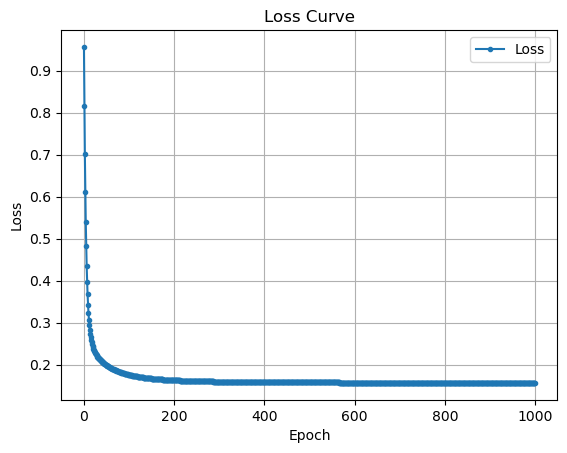

----------------Not Using SDG_MBGD-----------
Epoch 0, loss:0.9657654462340294，w:[ 0.00128896  0.01915552  0.01983459  0.02258341  0.00757495  0.02117846
  0.01260415  0.00322814  0.00728198  0.02096476 -0.00993708 -0.00884387],b:1.0831444142684454e-18 

Epoch 10, loss:0.31249326704063346，w:[-0.00317386  0.07889997  0.0875077   0.10627345  0.01005587  0.12693317
  0.06345085  0.0106708   0.018051    0.11705777 -0.08038408 -0.08212034],b:-1.8196826159709882e-16 

Epoch 20, loss:0.2384317943057039，w:[ 0.00601468  0.09095365  0.10006386  0.13395325  0.00027481  0.17541139
  0.06992493  0.00583765  0.02838788  0.158087   -0.09617056 -0.09946548],b:-4.845988109437027e-16 

Epoch 30, loss:0.2173585815154115，w:[ 0.01600981  0.09124534  0.09801838  0.14537328 -0.00937318  0.20552782
  0.06430346 -0.00186567  0.03833834  0.18102473 -0.09606363 -0.10073701],b:-7.727152251391094e-16 

Epoch 40, loss:0.20460072153493947，w:[ 0.02414307  0.08934553  0.09251677  0.15174578 -0.01649437  0.22866884
  0

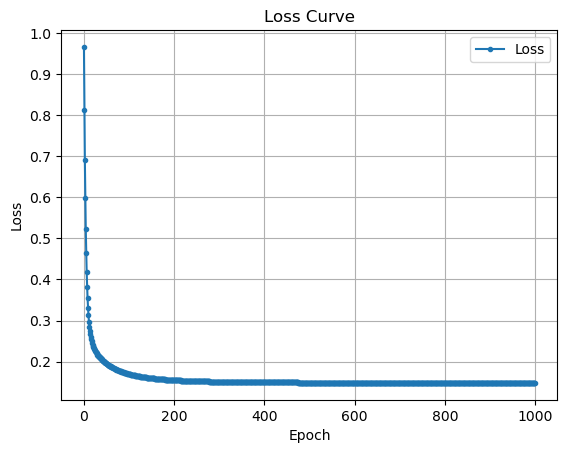

----------------Not Using SDG_MBGD-----------
Epoch 0, loss:0.98272324856629，w:[ 0.00346077  0.0163396   0.02385739  0.01686647  0.0091579   0.02266825
  0.01180394  0.00220157  0.00176044  0.01983318 -0.00481523 -0.00836691],b:1.5164021799758238e-18 

Epoch 10, loss:0.314900705067823，w:[ 0.00080563  0.08060563  0.09454816  0.10476665  0.0121351   0.12802319
  0.06722303  0.00803305  0.00849416  0.11291183 -0.07427514 -0.07897086],b:-8.513515096149981e-17 

Epoch 20, loss:0.24482281386089103，w:[ 0.00691009  0.09558794  0.10870157  0.13434677  0.00477734  0.17554396
  0.07523978  0.00475783  0.01627744  0.14989037 -0.08867947 -0.09357182],b:-2.326594201848622e-16 

Epoch 30, loss:0.22719362829717765，w:[ 0.01347888  0.09762175  0.10751925  0.14672609 -0.00290291  0.20493536
  0.07015851 -0.00117653  0.02386614  0.16924611 -0.08757017 -0.09246868],b:-3.7260167850834545e-16 

Epoch 40, loss:0.21644681086489725，w:[ 0.01881492  0.09668189  0.10251307  0.15367049 -0.00882742  0.227739
  0.061

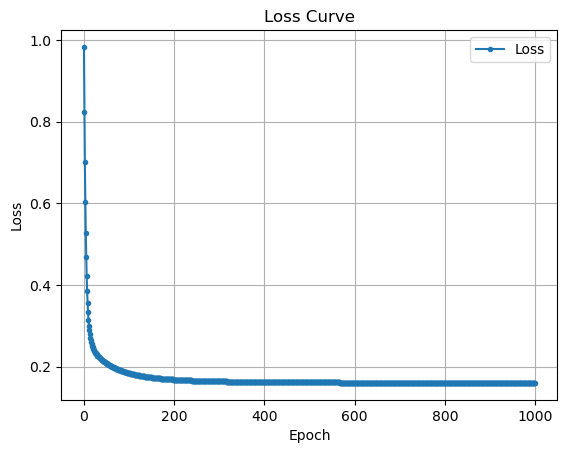

----------------Not Using SDG_MBGD-----------
Epoch 0, loss:0.9665497946159068，w:[ 0.00296433  0.01949294  0.01552422  0.02228496  0.01210913  0.02186825
  0.01424791  0.00781607  0.00442973  0.02335287 -0.00519672 -0.00740127],b:1.0831444142684455e-19 

Epoch 10, loss:0.34108063164515695，w:[ 0.00158419  0.07539563  0.08213875  0.10024288  0.02528115  0.12720749
  0.07094704  0.01341493  0.02167915  0.11871747 -0.07393018 -0.07552456],b:-8.686818202432932e-17 

Epoch 20, loss:0.26607243420582544，w:[ 0.01133223  0.08550805  0.09502281  0.12323109  0.01978249  0.17715512
  0.08212643  0.01005635  0.03850858  0.16140474 -0.09024825 -0.09029289],b:-2.3114301800488636e-16 

Epoch 30, loss:0.2430322063525455，w:[ 0.02108832  0.08412476  0.09340743  0.13026472  0.01180522  0.20898181
  0.08008711  0.0035992   0.05422287  0.18649706 -0.09125032 -0.08976873],b:-3.7021876079695487e-16 

Epoch 40, loss:0.22843127453811515，w:[ 0.02861824  0.08056437  0.08827406  0.13249699  0.00507973  0.23376562
 

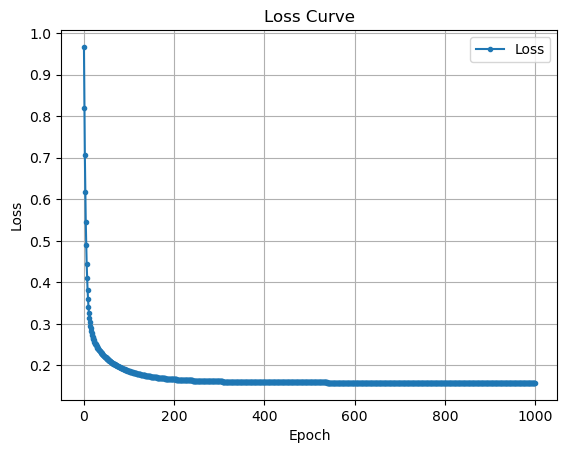

----------------Not Using SDG_MBGD-----------
Epoch 0, loss:0.9720169433824007，w:[ 0.00469803  0.01508851  0.01951991  0.0184882   0.00653614  0.02552369
  0.01549819  0.00992664  0.00934071  0.02004961 -0.00574167 -0.00595219],b:2.166288828536891e-19 

Epoch 10, loss:0.34641147818702095，w:[ 0.00421544  0.06375422  0.08390681  0.09551731  0.01088362  0.1326442
  0.06747502  0.01312402  0.02522907  0.12182388 -0.0774419  -0.07788603],b:-5.76232828390813e-17 

Epoch 20, loss:0.26623423402612345，w:[ 0.01045236  0.07050956  0.09597549  0.11940803  0.00491357  0.18361561
  0.07496917  0.00852869  0.04036697  0.16925332 -0.09541877 -0.09469463],b:-1.5142358911472868e-16 

Epoch 30, loss:0.2419438620571469，w:[ 0.016108    0.06672624  0.09355123  0.12732    -0.00094043  0.21534292
  0.06940259  0.00143665  0.05459717  0.19780768 -0.09708904 -0.09492694],b:-2.369919978419359e-16 

Epoch 40, loss:0.22686095941111764，w:[ 0.01995961  0.06113474  0.08760397  0.13031466 -0.00462632  0.239343
  0.060

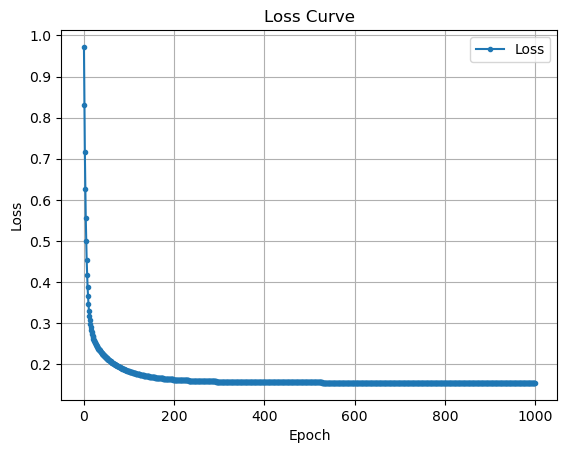

In [26]:

cv_folds = 5
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

mse_train_scores, mse_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []
r2_train_scores, r2_test_scores = [], []

for train_index, test_index in kf.split(X_new):

    X_fold_train, X_fold_test = X_new[train_index], X_new[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_fold_train = scaler_X.fit_transform(X_fold_train)
    y_fold_train = scaler_y.fit_transform(y_fold_train.reshape(-1, 1))
    X_fold_test = scaler_X.transform(X_fold_test)
    y_fold_test = scaler_y.transform(y_fold_test.reshape(-1, 1))
    
    w,b = gradient_descent_self(X_fold_train, y_fold_train, 0.01, 1000)
    y_train_pred = np.dot(X_fold_train, w) + b
    y_test_pred = np.dot(X_fold_test, w) + b

    mse_train = mean_squared_error(y_fold_train, y_train_pred)
    mse_test = mean_squared_error(y_fold_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_fold_train, y_train_pred)
    r2_test = r2_score(y_fold_test, y_test_pred)
    
    mse_train_scores.append(mse_train)
    mse_test_scores.append(mse_test)
    rmse_train_scores.append(rmse_train)
    rmse_test_scores.append(rmse_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)

In [27]:
results = {
    "Fold1": [mse_train_scores[0], mse_test_scores[0], rmse_train_scores[0], rmse_test_scores[0], r2_train_scores[0], r2_test_scores[0]],
    "Fold2": [mse_train_scores[1], mse_test_scores[1], rmse_train_scores[1], rmse_test_scores[1], r2_train_scores[1], r2_test_scores[1]],
    "Fold3": [mse_train_scores[2], mse_test_scores[2], rmse_train_scores[2], rmse_test_scores[2], r2_train_scores[2], r2_test_scores[2]],
    "Fold4": [mse_train_scores[3], mse_test_scores[3], rmse_train_scores[3], rmse_test_scores[3], r2_train_scores[3], r2_test_scores[3]],
    "Fold5": [mse_train_scores[4], mse_test_scores[4], rmse_train_scores[4], rmse_test_scores[4], r2_train_scores[4], r2_test_scores[4]],
    "Mean (E)": [
        np.mean(mse_train_scores), np.mean(mse_test_scores),
        np.mean(rmse_train_scores), np.mean(rmse_test_scores),
        np.mean(r2_train_scores), np.mean(r2_test_scores)
    ],
    "STD": [
        np.std(mse_train_scores), np.std(mse_test_scores),
        np.std(rmse_train_scores), np.std(rmse_test_scores),
        np.std(r2_train_scores), np.std(r2_test_scores)
    ]
}

# 表格的行名
index = ["MSE-Train", "MSE-Test", "RMSE-Train", "RMSE-Test", "R²-Train", "R²-Test"]

# 创建 DataFrame 显示结果
results_df = pd.DataFrame(results, index=index)
results_df   

,Fold1,Fold2,Fold3,Fold4,Fold5,Mean (E),STD
MSE-Train,0.156593,0.148252,0.160054,0.157967,0.154930,0.155559,0.004022
MSE-Test,0.229903,0.142578,0.134915,0.209076,0.254578,0.194210,0.047584
RMSE-Train,0.395718,0.385035,0.400068,0.397451,0.393611,0.394377,0.005128
RMSE-Test,0.479482,0.377595,0.367308,0.457248,0.504557,0.437238,0.055071
R²-Train,0.843407,0.851748,0.839946,0.842033,0.845070,0.844441,0.004022
R²-Test,0.826321,0.735723,0.826205,0.810423,0.804497,0.800634,0.033579


-------------Using SDG_MBGD-----------------
Epoch 0, Avg Loss: 0.8099245194702741, w: [ 0.00725379  0.02516144  0.03872613  0.03848472  0.01065311  0.04473609
  0.02946555  0.00076248  0.00290257  0.03990372 -0.02813726 -0.02720632], b: 0.00016202226029384762
Epoch 10, Avg Loss: 0.23483105122534811, w: [ 0.0293031   0.06720633  0.10134061  0.13846947 -0.01003177  0.20306119
  0.07995009 -0.01509395  0.03357585  0.17892217 -0.11212979 -0.10805644], b: 0.00016063814971401641
Epoch 20, Avg Loss: 0.20774750193350558, w: [ 0.0406801   0.05605977  0.08804898  0.14963205 -0.02126141  0.25759728
  0.06063028 -0.03534056  0.06387521  0.21491393 -0.10632285 -0.09936272], b: 0.0002325882194040103
Epoch 30, Avg Loss: 0.20102186608104358, w: [ 0.04392362  0.04837311  0.07467011  0.15410092 -0.02187261  0.29560556
  0.04036002 -0.05212963  0.08533892  0.23629339 -0.09807362 -0.08847436], b: 0.00025463837088205007
Epoch 40, Avg Loss: 0.18574942578538314, w: [ 0.04387384  0.04362408  0.06304441  0.15

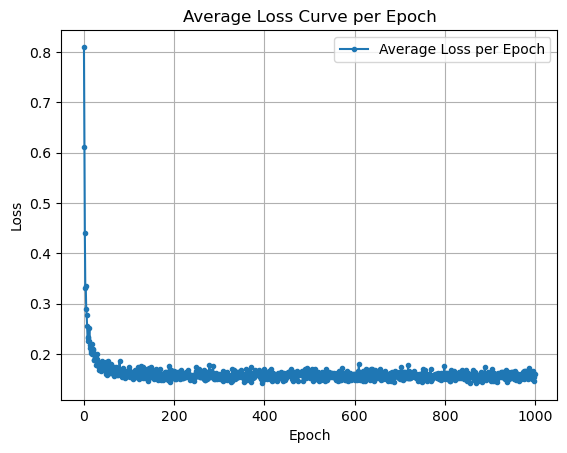

-------------Using SDG_MBGD-----------------
Epoch 0, Avg Loss: 0.8568678848846902, w: [-0.0010156   0.03159765  0.03238045  0.0414198   0.01302297  0.04637427
  0.02905074  0.01084933  0.0048039   0.03798293 -0.02822164 -0.02618656], b: -0.0002473155117438384
Epoch 10, Avg Loss: 0.21012603742486816, w: [ 0.01330138  0.08930778  0.09499489  0.14295333 -0.00410473  0.20076338
  0.06935469  0.00377874  0.03255569  0.17225009 -0.09775221 -0.10062921], b: -3.347743538609086e-05
Epoch 20, Avg Loss: 0.21078574280027026, w: [ 0.03152107  0.0856637   0.08154301  0.15839362 -0.01939911  0.25690186
  0.04718946 -0.01699612  0.05598725  0.21009956 -0.0851239  -0.09177726], b: 6.557985726348998e-05
Epoch 30, Avg Loss: 0.17443944430195377, w: [ 0.04040677  0.08400686  0.06782656  0.16623152 -0.02308569  0.29701255
  0.02604224 -0.0342375   0.07228497  0.23332135 -0.07049085 -0.08084561], b: 9.59641525164394e-05
Epoch 40, Avg Loss: 0.17174232039034976, w: [ 0.04507007  0.08413258  0.05554219  0.1708

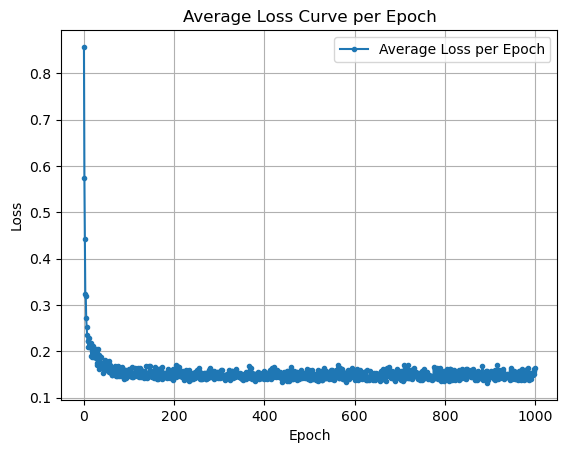

-------------Using SDG_MBGD-----------------
Epoch 0, Avg Loss: 0.8582704120181107, w: [-0.00023359  0.03651877  0.04032253  0.04624389  0.0103396   0.04200711
  0.03179643  0.00401124  0.00445516  0.03931653 -0.02220226 -0.02413723], b: -2.650521851992136e-05
Epoch 10, Avg Loss: 0.2465846296821479, w: [ 0.01109585  0.09958427  0.10539799  0.15063243 -0.00289999  0.19331146
  0.07562305  0.00038191  0.02179591  0.16288875 -0.08809757 -0.09096453], b: -5.0622605244044245e-05
Epoch 20, Avg Loss: 0.2041550333407168, w: [ 0.02356144  0.09637874  0.09176426  0.16544985 -0.01566102  0.24862435
  0.05273461 -0.01640803  0.03776745  0.19349824 -0.07416307 -0.07702792], b: 7.491455430657083e-05
Epoch 30, Avg Loss: 0.1967638326497633, w: [ 0.02957088  0.09456633  0.07875544  0.17376564 -0.01894959  0.29082867
  0.03149827 -0.03154862  0.04874087  0.21356077 -0.06111449 -0.06386556], b: 5.873920573199652e-05
Epoch 40, Avg Loss: 0.17883710029169086, w: [ 0.03285061  0.0937864   0.06705316  0.17893

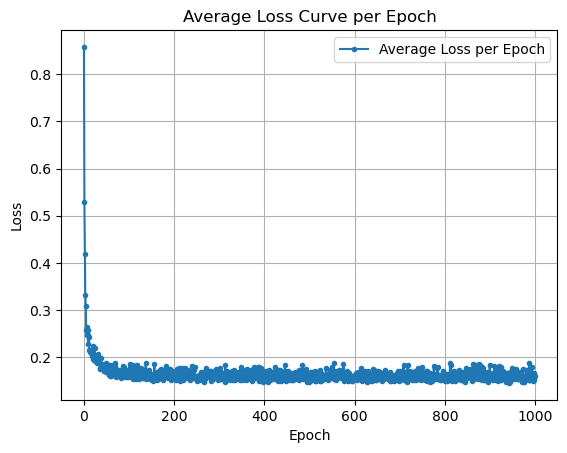

-------------Using SDG_MBGD-----------------
Epoch 0, Avg Loss: 0.8229796354149898, w: [ 0.0020353   0.03341267  0.03273771  0.03627003  0.01198668  0.04514322
  0.02999801  0.01014374  0.01332027  0.04220094 -0.0240633  -0.02570977], b: 0.0004880479653668842
Epoch 10, Avg Loss: 0.2508117002070442, w: [ 0.01810552  0.08538677  0.09562638  0.12517086  0.01085769  0.20167099
  0.08293804  0.00563716  0.05516576  0.17883618 -0.09395775 -0.09224707], b: 0.00035734553594428625
Epoch 20, Avg Loss: 0.2247513924004759, w: [ 0.03432273  0.07682104  0.08201982  0.12930334 -0.0035396   0.26106885
  0.06643261 -0.0146853   0.08851874  0.22162596 -0.08422811 -0.07936415], b: 0.00018049669722350656
Epoch 30, Avg Loss: 0.1886574769401769, w: [ 0.03999178  0.07116127  0.06872647  0.12831483 -0.00959954  0.30474819
  0.0480772  -0.03520254  0.11252012  0.25020632 -0.07343835 -0.06627803], b: 8.176311016323487e-05
Epoch 40, Avg Loss: 0.18512223150760265, w: [ 0.04049821  0.06809563  0.05710175  0.125724

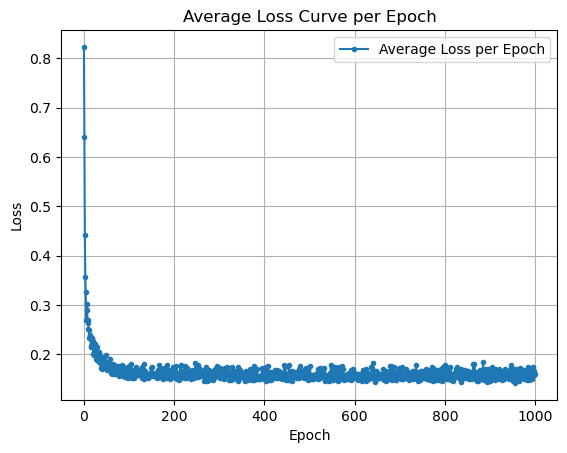

-------------Using SDG_MBGD-----------------
Epoch 0, Avg Loss: 0.8043686919440224, w: [ 0.0068203   0.03202921  0.03008476  0.03349002  0.01109601  0.04993931
  0.03024908  0.00408278  0.01255418  0.04560355 -0.02853236 -0.03125739], b: -5.109897794584601e-05
Epoch 10, Avg Loss: 0.2574185555693559, w: [ 0.0171217   0.0721895   0.08840734  0.12256677  0.00244894  0.20828222
  0.07111635 -0.00085879  0.05276834  0.19259607 -0.10003357 -0.10064029], b: 0.00028041165956959734
Epoch 20, Avg Loss: 0.22284915782457107, w: [ 0.02440046  0.05883408  0.07316865  0.12890434 -0.0045038   0.26508609
  0.04651578 -0.01931979  0.08486956  0.24132958 -0.08983382 -0.08673848], b: 0.0001880379718937642
Epoch 30, Avg Loss: 0.18996941432897196, w: [ 0.02531882  0.04939598  0.05893413  0.13031912 -0.0019138   0.30495691
  0.02231011 -0.03750622  0.10739628  0.27514869 -0.07894266 -0.07205969], b: 0.00018593599665613585
Epoch 40, Avg Loss: 0.1946905446202496, w: [ 0.02440686  0.04340748  0.04741602  0.1307

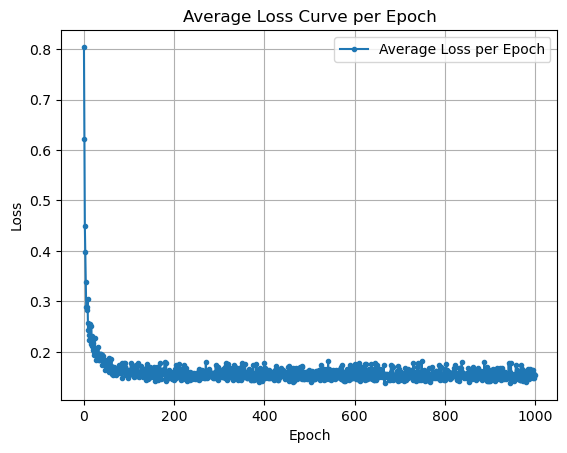

In [28]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler

# 初始化交叉验证折数
cv_folds = 5
kf = KFold(n_splits=cv_folds, shuffle=True, random_state=42)

mse_train_scores, mse_test_scores = [], []
rmse_train_scores, rmse_test_scores = [], []
r2_train_scores, r2_test_scores = [], []


# 交叉验证循环
for train_index, test_index in kf.split(X_new):

    X_fold_train, X_fold_test = X_new[train_index], X_new[test_index]
    y_fold_train, y_fold_test = y[train_index], y[test_index]
    
    # 缩放
    scaler_X = StandardScaler()
    scaler_y = StandardScaler()
    X_fold_train = scaler_X.fit_transform(X_fold_train)
    y_fold_train = scaler_y.fit_transform(y_fold_train.reshape(-1, 1))
    X_fold_test = scaler_X.transform(X_fold_test)
    y_fold_test = scaler_y.transform(y_fold_test.reshape(-1, 1))
    
    w,b = gradient_descent_self(X_fold_train, y_fold_train, 0.01, 1000,SDG_MBGD=True,batch_size=64)
    y_train_pred = np.dot(X_fold_train, w) + b
    y_test_pred = np.dot(X_fold_test, w) + b

    
    mse_train = mean_squared_error(y_fold_train, y_train_pred)
    mse_test = mean_squared_error(y_fold_test, y_test_pred)
    rmse_train = np.sqrt(mse_train)
    rmse_test = np.sqrt(mse_test)
    r2_train = r2_score(y_fold_train, y_train_pred)
    r2_test = r2_score(y_fold_test, y_test_pred)
    
    mse_train_scores.append(mse_train)
    mse_test_scores.append(mse_test)
    rmse_train_scores.append(rmse_train)
    rmse_test_scores.append(rmse_test)
    r2_train_scores.append(r2_train)
    r2_test_scores.append(r2_test)
    

In [29]:
results = {
    "Fold1": [mse_train_scores[0], mse_test_scores[0], rmse_train_scores[0], rmse_test_scores[0], r2_train_scores[0], r2_test_scores[0]],
    "Fold2": [mse_train_scores[1], mse_test_scores[1], rmse_train_scores[1], rmse_test_scores[1], r2_train_scores[1], r2_test_scores[1]],
    "Fold3": [mse_train_scores[2], mse_test_scores[2], rmse_train_scores[2], rmse_test_scores[2], r2_train_scores[2], r2_test_scores[2]],
    "Fold4": [mse_train_scores[3], mse_test_scores[3], rmse_train_scores[3], rmse_test_scores[3], r2_train_scores[3], r2_test_scores[3]],
    "Fold5": [mse_train_scores[4], mse_test_scores[4], rmse_train_scores[4], rmse_test_scores[4], r2_train_scores[4], r2_test_scores[4]],
    "Mean (E)": [
        np.mean(mse_train_scores), np.mean(mse_test_scores),
        np.mean(rmse_train_scores), np.mean(rmse_test_scores),
        np.mean(r2_train_scores), np.mean(r2_test_scores)
    ],
    "STD": [
        np.std(mse_train_scores), np.std(mse_test_scores),
        np.std(rmse_train_scores), np.std(rmse_test_scores),
        np.std(r2_train_scores), np.std(r2_test_scores)
    ]
}
# 表格的行名
index = ["MSE-Train", "MSE-Test", "RMSE-Train", "RMSE-Test", "R²-Train", "R²-Test"]
# 创建 DataFrame 显示结果
results_df = pd.DataFrame(results, index=index)
results_df 

,Fold1,Fold2,Fold3,Fold4,Fold5,Mean (E),STD
MSE-Train,0.155468,0.148032,0.159316,0.157167,0.153760,0.154749,0.003829
MSE-Test,0.231380,0.143312,0.136429,0.210603,0.258187,0.195982,0.048285
RMSE-Train,0.394294,0.384749,0.399144,0.396443,0.392123,0.393351,0.004889
RMSE-Test,0.481020,0.378565,0.369363,0.458915,0.508121,0.439197,0.055572
R²-Train,0.844532,0.851968,0.840684,0.842833,0.846240,0.845251,0.003829
R²-Test,0.825205,0.734363,0.824255,0.809038,0.801725,0.798917,0.033498
